In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv('result_final.csv')

In [40]:
df[df['MILEAGE_NO'] == 0].groupby('SOLD')['SALES_ID'].count()

SOLD
N    13
Y     4
Name: SALES_ID, dtype: int64

In [41]:
df.groupby(['MILEAGE_UNIT','FUEL'])['SALES_ID'].count()

MILEAGE_UNIT  FUEL  
km/kg         CNG         52
              LPG         35
kmpl          Diesel    4299
              Petrol    3520
Name: SALES_ID, dtype: int64

In [42]:
df.groupby(['REGION'])['SALES_ID'].count()

REGION
Central       1087
East          1303
North          843
North East     257
South         2798
West          1618
Name: SALES_ID, dtype: int64

In [43]:
df.head()

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MILEAGE,ENGINE,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,23.4 kmpl,1248 CC,74 bhp,5,kmpl,23.40,Maharashtra,Mumbai,Y,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,21.14 kmpl,1498 CC,103.52 bhp,5,kmpl,21.14,Jharkhand,Ranchi,Y,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,17.7 kmpl,1497 CC,78 bhp,5,kmpl,17.70,Uttar Pradesh,Noida,Y,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,23.0 kmpl,1396 CC,90 bhp,5,kmpl,23.00,Uttarakhand,Dehradun,Y,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,16.1 kmpl,1298 CC,88.2 bhp,5,kmpl,16.10,Tamil Nadu,Chennai,Y,South


In [44]:
df.shape

(7906, 22)

In [45]:
df[['ENGINE_CC','ENGINE_UNIT']]=df['ENGINE'].str.split(' ',expand = True)
df[['MAX_POWER_BHP','MAX_POWER_UNIT']] = df['MAX_POWER'].str.split(' ',expand = True)
df['COMPANY'] = df['NAME'].str.split(' ').str[0]
df['MODEL'] = df['NAME'].str.split(' ').str[1]

In [46]:
print(df.groupby('MAX_POWER_UNIT')['NAME'].count())
df.groupby('ENGINE_UNIT')['NAME'].count()

MAX_POWER_UNIT
bhp    7906
Name: NAME, dtype: int64


ENGINE_UNIT
CC    7906
Name: NAME, dtype: int64

In [47]:
df = df.drop(['MAX_POWER_UNIT','ENGINE_UNIT','NAME','CITY_CODE','STATE_CODE','MILEAGE','ENGINE','MAX_POWER','MILEAGE_UNIT'],axis = 1)

In [48]:
df[['ENGINE_CC','MAX_POWER_BHP']] = df[['ENGINE_CC','MAX_POWER_BHP']].apply(pd.to_numeric)

In [49]:
#df.to_csv('azure.csv')

In [56]:
df.loc[(df.COMPANY == "Land"),"COMPANY"] = "Land Rover"

In [57]:
sold_df = df[df['SOLD'] == 'Y'].copy(deep = True)
unsold_df = df[df['SOLD'] == 'N'].copy(deep = True)

In [59]:
#sold_df["MODEL"].unique()

array(['Swift', 'Rapid', 'City', 'i20', 'Xcent', 'Wagon', '800', 'Etios',
       'Figo', 'Duster', 'Zen', 'KUV', 'Ertiga', 'Alto', 'Verito', 'WR-V',
       'SX4', 'Tigor', 'Baleno', 'Enjoy', 'Omni', 'Vitara', 'Verna', 'GO',
       'Safari', 'Compass', 'Fortuner', 'Innova', 'B', 'Amaze', 'Pajero',
       'Ciaz', 'Jazz', 'A6', 'Corolla', 'New', 'Manza', 'i10', 'Ameo',
       'Vento', 'EcoSport', 'X1', 'Celerio', 'Polo', 'Eeco', 'Scorpio',
       'Freestyle', 'Passat', 'Indica', 'XUV500', 'Indigo', 'Terrano',
       'Creta', 'KWID', 'Santro', 'Q5', 'ES', 'XF', 'Wrangler', 'Rover',
       'S-Class', '5', 'X4', 'Superb', 'E-Class', 'Hector', 'XC40', 'Q7',
       'Elantra', 'XE', 'Nexon', 'CLA', 'Glanza', '3', 'Camry', 'XC90',
       'Ritz', 'Grand', 'Matiz', 'Zest', 'Getz', 'Elite', 'Brio', 'Hexa',
       'Sunny', 'Micra', 'Ssangyong', 'Quanto', 'Accent', 'Ignis',
       'Marazzo', 'Tiago', 'Thar', 'Sumo', 'Bolero', 'GL-Class', 'Beat',
       'A-Star', 'XUV300', 'Nano', 'GTI', 'V40', 'CR-V'

In [65]:
df[["SELLING_PRICE","KM_DRIVEN","SEATS","MILEAGE_NO","ENGINE_CC","MAX_POWER_BHP"]].describe()

,SELLING_PRICE,KM_DRIVEN,SEATS,MILEAGE_NO,ENGINE_CC,MAX_POWER_BHP
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,5.416393,19.419861,1458.708829,91.587374
std,8.135827e+05,5.679230e+04,0.959208,4.036263,503.893057,35.747216
min,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,32.800000
25%,2.700000e+05,3.500000e+04,5.000000,16.780000,1197.000000,68.050000
50%,4.500000e+05,6.000000e+04,5.000000,19.300000,1248.000000,82.000000
75%,6.900000e+05,9.542500e+04,5.000000,22.320000,1582.000000,102.000000
max,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000


In [16]:
sold_df.describe()

,SALES_ID,YEAR,SELLING_PRICE,KM_DRIVEN,POSTAL_CODE,SEATS,MILEAGE_NO,ENGINE_CC,MAX_POWER_BHP
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1031.406500,2014.003000,6.763715e+05,6.870744e+04,505141.581500,5.433000,19.219300,1470.189500,92.22238
std,594.595097,3.793967,8.856885e+05,5.614378e+04,204565.408847,0.966943,4.019046,520.592394,37.02257
min,1.000000,1994.000000,3.150400e+04,1.000000e+03,110029.000000,4.000000,0.000000,624.000000,34.20000
25%,514.750000,2012.000000,2.695000e+05,3.392100e+04,391510.000000,5.000000,16.780000,1197.000000,68.00000
50%,1030.500000,2015.000000,4.500000e+05,6.000000e+04,524225.000000,5.000000,19.090000,1248.000000,82.40000
75%,1548.250000,2017.000000,6.800000e+05,9.400000e+04,680001.000000,5.000000,22.000000,1583.000000,103.20000
max,2061.000000,2020.000000,1.000000e+07,1.500000e+06,834001.000000,10.000000,42.000000,3604.000000,400.00000


In [17]:
unsold_df.describe()

,SALES_ID,YEAR,SELLING_PRICE,KM_DRIVEN,POSTAL_CODE,SEATS,MILEAGE_NO,ENGINE_CC,MAX_POWER_BHP
count,5906.000000,5906.000000,5.906000e+03,5.906000e+03,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000
mean,5099.127497,2013.977481,6.408202e+05,6.935162e+04,503027.333728,5.410769,19.487779,1454.821029,91.372336
std,1749.341324,3.887321,7.875471e+05,5.701403e+04,205080.806438,0.956592,4.040160,498.096236,35.305514
min,2062.000000,1994.000000,2.999900e+04,1.000000e+00,110001.000000,2.000000,0.000000,624.000000,32.800000
25%,3587.250000,2012.000000,2.700000e+05,3.500000e+04,391510.000000,5.000000,16.780000,1197.000000,68.050000
50%,5096.500000,2015.000000,4.500000e+05,6.000000e+04,524225.000000,5.000000,19.400000,1248.000000,82.000000
75%,6612.750000,2017.000000,6.900000e+05,9.600000e+04,680001.000000,5.000000,22.370000,1582.000000,102.000000
max,8128.000000,2020.000000,7.200000e+06,2.360457e+06,834001.000000,14.000000,33.440000,3604.000000,280.000000


In [58]:
sold_df.groupby("COMPANY")["SALES_ID"].count().sort_values(ascending = False)

COMPANY
Maruti           597
Hyundai          332
Mahindra         201
Tata             178
Toyota           126
Honda            124
Ford              92
Chevrolet         56
Renault           56
Volkswagen        39
Nissan            33
BMW               29
Jaguar            21
Skoda             20
Volvo             19
Datsun            16
Mercedes-Benz     16
Lexus             11
Audi               9
Jeep               9
Fiat               6
Mitsubishi         3
MG                 2
Kia                2
Force              1
Daewoo             1
Land Rover         1
Name: SALES_ID, dtype: int64

In [66]:
unsold_df.groupby("COMPANY")["SALES_ID"].count().sort_values(ascending = False)

COMPANY
Maruti           1770
Hyundai          1028
Mahindra          557
Tata              541
Honda             342
Toyota            326
Ford              296
Chevrolet         174
Renault           172
Volkswagen        146
BMW                89
Skoda              84
Jaguar             50
Datsun             49
Nissan             48
Volvo              48
Mercedes-Benz      38
Fiat               35
Audi               31
Lexus              23
Jeep               22
Mitsubishi         11
Land Rover          5
Force               5
Isuzu               5
Ambassador          4
Daewoo              2
Kia                 2
Opel                1
MG                  1
Ashok               1
Name: SALES_ID, dtype: int64

In [19]:
sold_df.groupby(["REGION"]).agg({"SELLING_PRICE":['count']})

,SELLING_PRICE
,count
REGION,
Central,284
East,329
North,198
North East,69
South,723
West,397


In [20]:
unsold_df.groupby(["REGION"]).agg({"SELLING_PRICE":['count']})

,SELLING_PRICE
,count
REGION,
Central,803
East,974
North,645
North East,188
South,2075
West,1221


## Finding null values

In [21]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>0]
print(feature_with_na)

for feature in feature_with_na:
    print(feature,df[feature].isnull().mean(),'fractional missing values')

[]


## Numerical Features

In [22]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
print('Total numerical Features:',len(numerical_features))

df[numerical_features].head()

Total numerical Features: 9


,SALES_ID,YEAR,SELLING_PRICE,KM_DRIVEN,POSTAL_CODE,SEATS,MILEAGE_NO,ENGINE_CC,MAX_POWER_BHP
0,1,2014,450000,145500,400001,5,23.40,1248,74.00
1,2,2014,370000,120000,834001,5,21.14,1498,103.52
2,3,2006,158000,140000,201301,5,17.70,1497,78.00
3,4,2010,225000,127000,248001,5,23.00,1396,90.00
4,5,2007,130000,120000,600020,5,16.10,1298,88.20


Text(0.5, 1.0, 'PRICE VS YEAR')

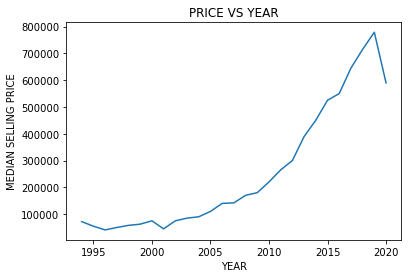

In [23]:
df.groupby('YEAR')['SELLING_PRICE'].median().plot()
plt.xlabel('YEAR')
plt.ylabel('MEDIAN SELLING PRICE')
plt.title('PRICE VS YEAR')

Text(0.5, 1.0, 'CARS SOLD VS PURCAHSE_YEAR')

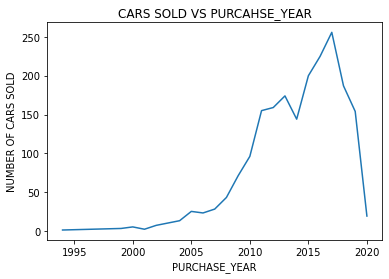

In [24]:
sold_df.groupby('YEAR')['SALES_ID'].count().plot()
plt.xlabel('PURCHASE_YEAR')
plt.ylabel('NUMBER OF CARS SOLD')
plt.title('CARS SOLD VS PURCAHSE_YEAR')

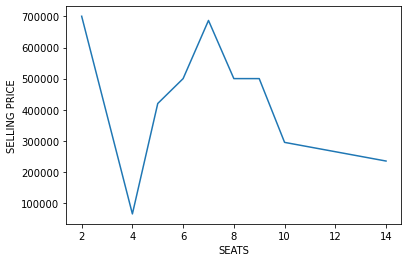

In [25]:
data = df.copy()
data.groupby('SEATS')['SELLING_PRICE'].median().plot()
plt.xlabel('SEATS')
plt.ylabel('SELLING PRICE')
plt.show()

NameError: name 'POSTAL_CODE' is not defined

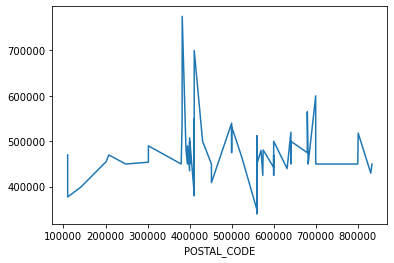

In [26]:
data = df.copy()
data.groupby('POSTAL_CODE')['SELLING_PRICE'].median().plot().bar(POSTAL_CODE,SELLING_PRICE)
plt.xlabel('POSTAL_CODE')
plt.ylabel('SELLING PRICE')
plt.title('SELLING PRICE')
plt.show()

In [ ]:
df['POSTAL_CODE'].unique()

## Continuous Features distribution

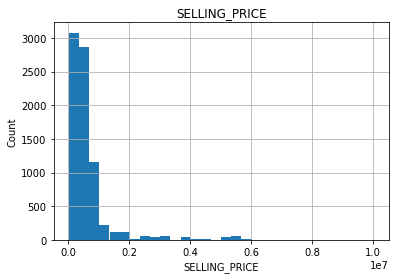

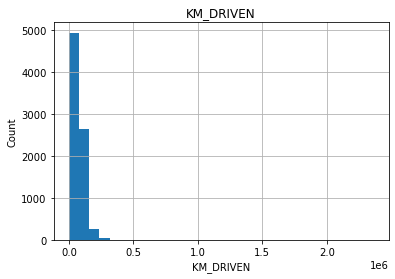

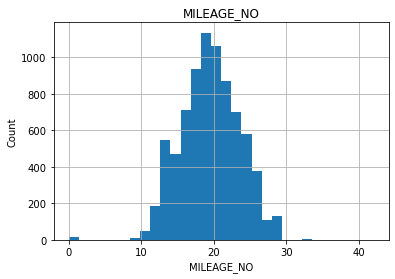

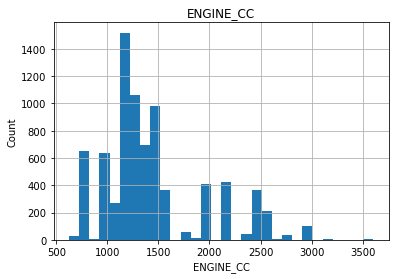

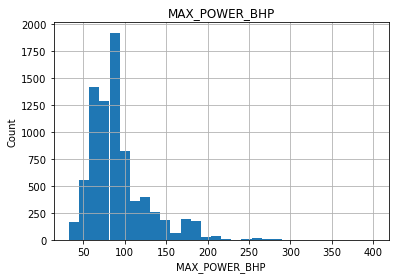

In [27]:
continuous_features = ['SELLING_PRICE','KM_DRIVEN','MILEAGE_NO','ENGINE_CC','MAX_POWER_BHP']

for features in continuous_features:
    data = df.copy()
    data[features].hist(bins=30)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.show()

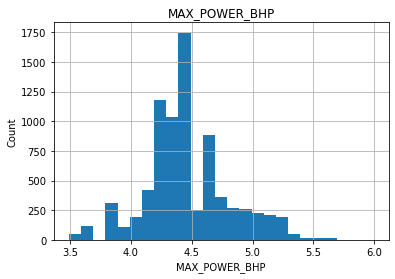

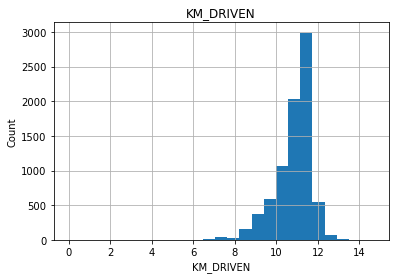

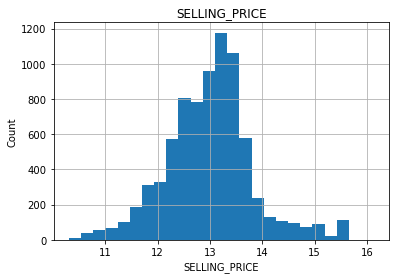

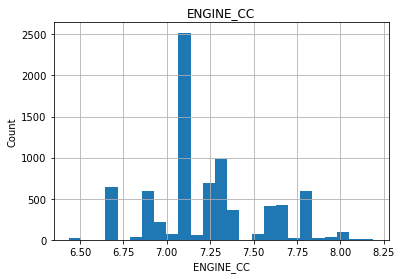

In [28]:
for features in list(set(continuous_features)-set(['MILEAGE_NO'])):
    data = df.copy()
    np.log(data[features]).hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.show()

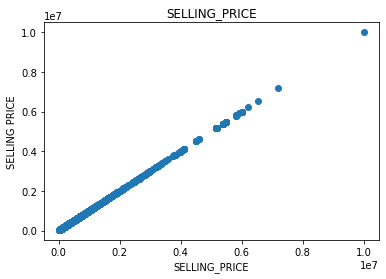

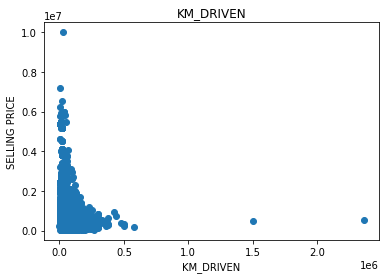

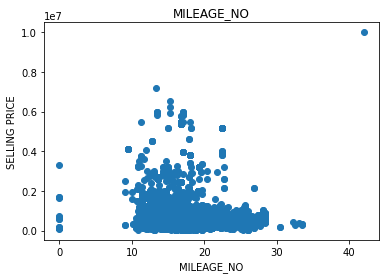

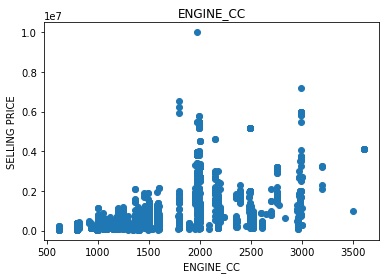

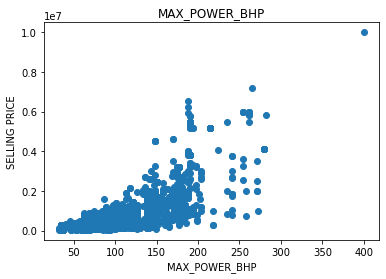

In [29]:
for feature in continuous_features:
    data = df.copy()
    plt.scatter(data[feature],data['SELLING_PRICE'])
    plt.xlabel(feature)
    plt.ylabel('SELLING PRICE')
    plt.title(feature)
    plt.show()

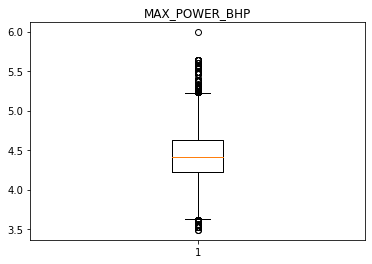

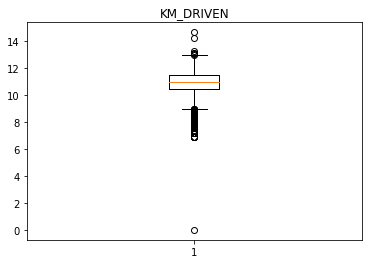

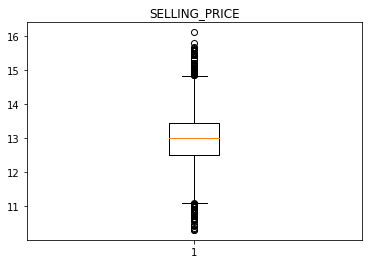

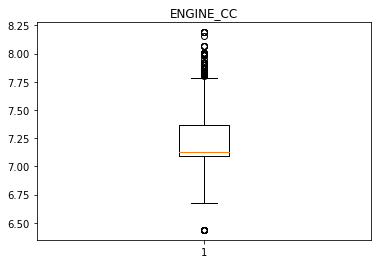

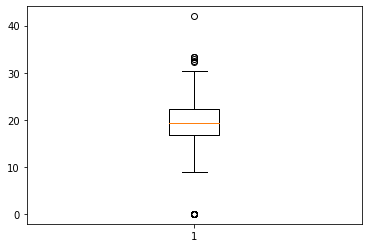

In [30]:
for feature in list(set(continuous_features)-set(['MILEAGE_NO'])):
    data = df.copy()
    plt.boxplot(np.log(data[feature]))
    plt.title(feature)
    plt.show()
plt.boxplot(df['MILEAGE_NO'])
plt.show()

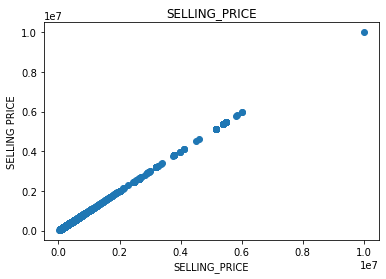

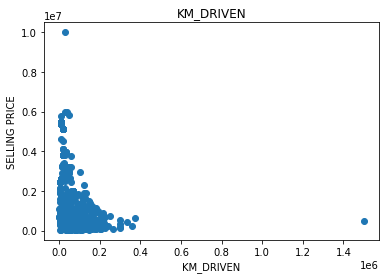

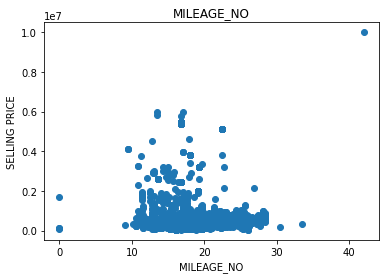

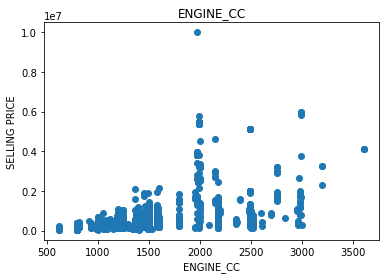

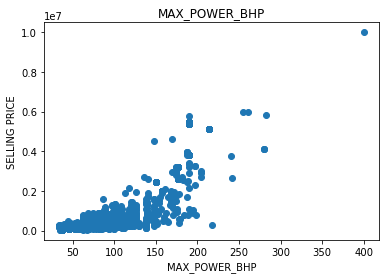

In [31]:
for feature in continuous_features:
    data = sold_df.copy()
    plt.scatter(data[feature],data['SELLING_PRICE'])
    plt.xlabel(feature)
    plt.ylabel('SELLING PRICE')
    plt.title(feature)
    plt.show()

In [32]:
for feature in continuous_features:
     data = sold_df.copy()
     print("{} {}".format(feature,data['SELLING_PRICE'].corr(data[feature])))

SELLING_PRICE 1.0
KM_DRIVEN -0.23536376181512653
MILEAGE_NO -0.10077194169192129
ENGINE_CC 0.4562636411989178
MAX_POWER_BHP 0.778370711394931


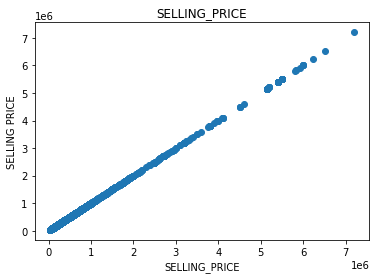

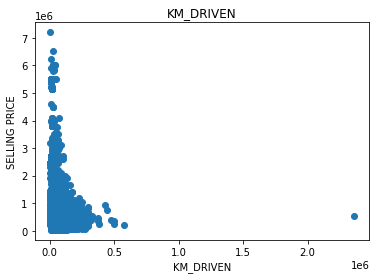

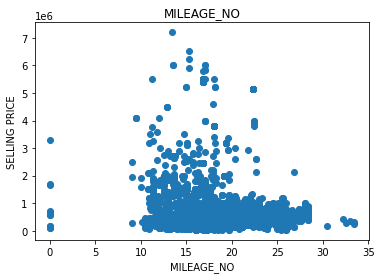

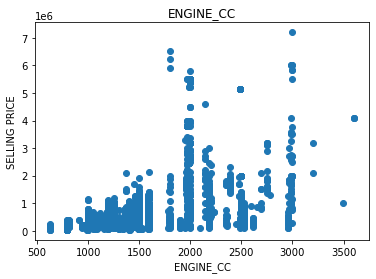

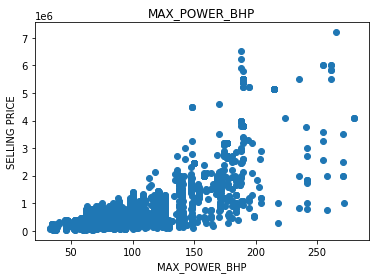

In [33]:
for feature in continuous_features:
    data = unsold_df.copy()
    plt.scatter(data[feature],data['SELLING_PRICE'])
    plt.xlabel(feature)
    plt.ylabel('SELLING PRICE')
    plt.title(feature)
    plt.show()

In [34]:
for feature in continuous_features:
     data = unsold_df.copy()
     print("{} {}".format(feature,data['SELLING_PRICE'].corr(data[feature])))

SELLING_PRICE 0.9999999999999999
KM_DRIVEN -0.2176723657189572
MILEAGE_NO -0.13554703823065756
ENGINE_CC 0.45561716555853415
MAX_POWER_BHP 0.7387111124064591


## categorical features

In [35]:
categorical_features = [features for features in df.columns if df[features].dtype=='O']
categorical_features

['FUEL',
 'SELLER_TYPE',
 'TRANSMISSION',
 'OWNER',
 'STATE_NAME',
 'CITY_NAME',
 'SOLD',
 'REGION',
 'COMPANY',
 'MODEL']

In [36]:
for feature in categorical_features:
    print(feature,len(df[feature].unique()))

FUEL 4
SELLER_TYPE 3
TRANSMISSION 2
OWNER 5
STATE_NAME 18
CITY_NAME 29
SOLD 2
REGION 6
COMPANY 31
MODEL 197


## realtion between categorical feature and selling price

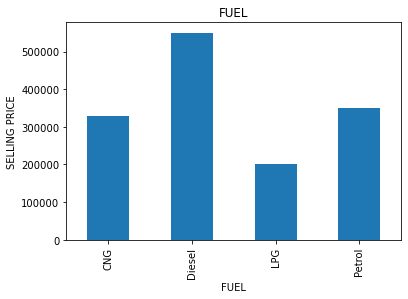

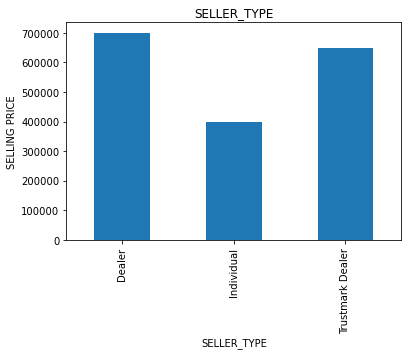

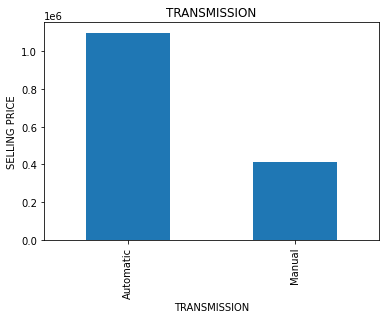

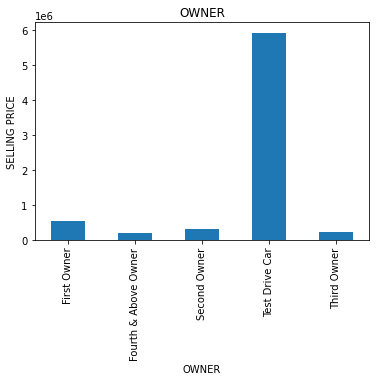

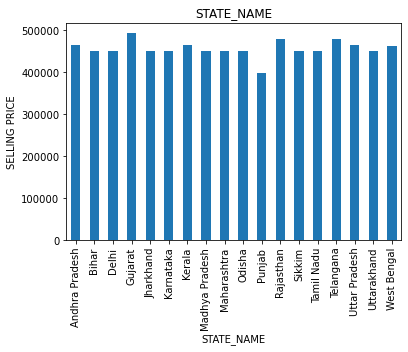

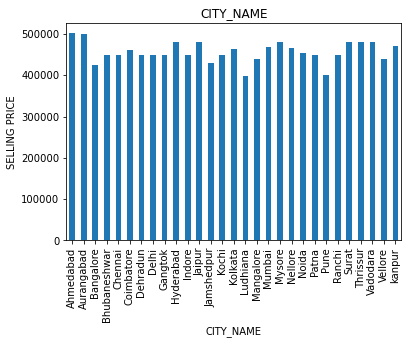

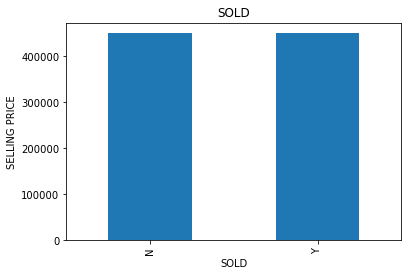

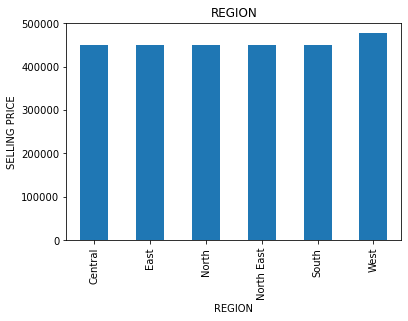

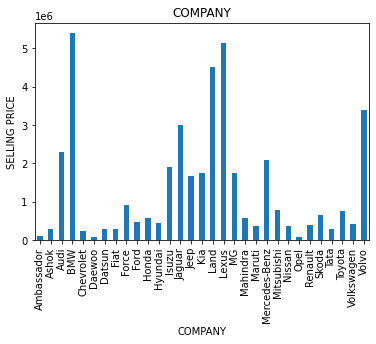

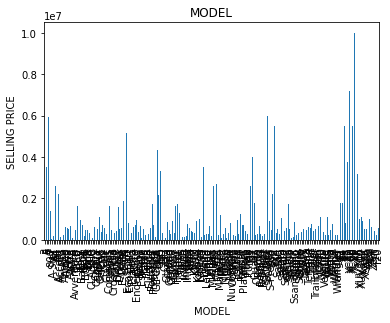

In [37]:
for feature in categorical_features:
    
    data = df.copy()
    data.groupby(feature)['SELLING_PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SELLING PRICE')
    plt.title(feature)
    plt.show()

In [85]:
df[df["OWNER"] == "Test Drive Car"]

,SALES_ID,YEAR,SELLING_PRICE,KM_DRIVEN,POSTAL_CODE,FUEL,SELLER_TYPE,TRANSMISSION,OWNER,SEATS,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION,ENGINE_CC,MAX_POWER_BHP,COMPANY,MODEL
4256,4384,2019,1350000,5400,411005,Diesel,Dealer,Manual,Test Drive Car,5,22.27,Maharashtra,Pune,N,West,1498,108.60,Volkswagen,Vento
4811,4951,2019,6223000,7800,431001,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,Maharashtra,Aurangabad,N,West,1798,187.74,Audi,A6
4812,4952,2019,5923000,11500,682024,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,Kerala,Kochi,N,South,1798,187.74,Audi,A6
4813,4953,2019,6523000,23600,800002,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,Bihar,Patna,N,East,1798,187.74,Audi,A6
6047,6221,2019,2000000,24857,680001,Petrol,Dealer,Automatic,Test Drive Car,5,16.50,Kerala,Thrissur,N,South,1799,139.46,Honda,Civic


In [77]:
sold_df["OWNER"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)